# Final report task / 最終レポート課題

## Create your own dataset / あなた自身のデータセットを作成する

You should find an interesting question to which classification can be applied. It can be any topic familiar to you, such as something based your interests and hobies. You can collect data from your lab, from your friends, from the internet, from your surroundings, etc.

__This must not be just a dataset that is already published or readily available on the internet. Also, do not use the same topic as other students, and do not use datasets created by others.__

Any type of data is fine. 
However, we expect the following: 

- to properly solve a machine learning problem the dataset should have enough data. For this report, there should be at least enough data to be able to test the machine learning. (the dataset does not have to be very large, but 20 is the bare minimum)

- there should be enough meaningful features (it is preffered that you have multiple inputs)


分類を適用できる面白い問題を見つけてください。興味や趣味に基づいたものなど、身近な問題で構いません。データを収集できる方法がいろいろあります：研究室から、友達から、インターネットから、周囲から。

__なお、すでに公開されている、またはインターネットから簡単にダウンロードできるデータセットは使えません。また、他の学生と同じ問題を使わず、他人が作成したデータセットも使用しないでください。__

データはなんでも大丈夫です。
しかし、以下のことを期待しています：

 - しっかりとした機械学習のためにはデータセットは十分なデータを持っている必要があります。今回のレポートのためには、少なくてもアイデアを試して機械学習が成り立つ程度にはデータを集める必要があります。（それほど大きくなくても構いませんが、少なくても２０は必要でしょう）

 - 各データに意味のある特徴量が十分にある必要があります（複数の入力のほうが望ましいです）

### Description of the dataset / データセットについて

Shortly describe the problem and the dataset in the cell below.

下のセルを使ってに見つけった問題やデータセットについて簡単に説明してください。


### 問題: 「自分の1日の消費行動から、その日が平日であるか祝休日であるかを判定できるか」
たとえば、平日は会社に行くために電車に乗り、休日は友達とご飯を食べに行くためにレストランに行くなど、
人の平日の消費行動と祝休日の消費行動は異なるはずである。
このことから、1日のうち何にいくら使ったか、という情報から、その日が平日なのか、祝休日なのかを判定できると考えた。
### データセット
データは、私の2020年1月20日から2月28日の支出額を「マネーフォワード」というサービスで記録したものである。
支出額は、通信費、食費、交際費、交通費、衣服・美容という項目に分けて記録されており、雑費などは含めていない。
- 1列目は平日であれば0、祝休日であれば1が入力されている
- 2列目は通信費
- 3列目は食費
- 4列目は交際費
- 5列目は交通費
- 6列目は衣服・美容

## Data / データ

### Load the data / データの読み込み

In the cell below load your data.

下のセルにデータを読み込んでください。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load data
mf= np.genfromtxt('MF.csv', delimiter=',')

X = mf[:,1:]
y = mf[:,0]
print("X has shape:", X.shape)
print("y has shape:", y.shape)

X has shape: (58, 5)
y has shape: (58,)


### Plot the data / データのプロット

Visualize your data using plots.

プロットをつかてデータを可視化してください。

Text(0.5, 1.0, 'My Comsuption')

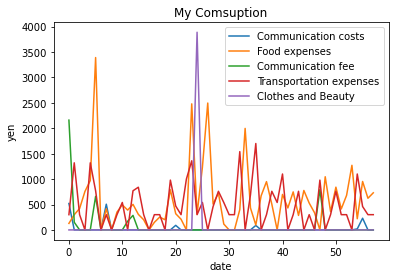

In [2]:
plt.plot(X[:,0], label="Communication costs")
plt.plot(X[:,1], label="Food expenses")
plt.plot(X[:,2], label="Communication fee")
plt.plot(X[:,3], label="Transportation expenses")
plt.plot(X[:,4], label="Clothes and Beauty")

plt.legend()
plt.xlabel("date")
plt.ylabel("yen")
plt.title("My Comsuption")

### Prepare the data / データの準備

Do all the necessary preprocessing (dividing into training and test data, standardizing).

必要な前処理を実行してください（トレーニングデータとテストデータへの分割、標準化など）。

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 40
Testing set size: 18


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train);
X_train_raw = X_train
X_train = scaler.transform(X_train_raw)
X_test_raw = X_test
X_test = scaler.transform(X_test_raw)

## Classification / 分類

### Training of the classifier / 分類器の訓練

Train one or more classification methods on your training data.

You can use any classification method (SVM, neural network, etc.). The important thing is that you _try solving the problem by yourself and get the best possible result_. If you are working on a hard problem it is not important that the final accuracy you achieve is very high.

トレーニングデータに基づいて1つ（または複数）の分類器をトレーニングしてください。

任意の分類方法（SVM、ニューラルネットワークなど）を使用できます。 重要なことは、あなたが自分で問題を解決してできるだけ良い結果を得ることです。認識が難しい問題なら、最終的な精度がそれほど高くなくても構いません。

In [5]:
from sklearn.svm import LinearSVC

linear_SVC = LinearSVC()
linear_SVC.fit(X_train, y_train)

LinearSVC()

In [6]:
# Import Tensorflow 
import tensorflow as tf

# Import Keras stuff
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

input_shape = X_train[0].shape
vector_input = Input(shape = input_shape, name='input')

fc1 = Dense(128, activation='relu', name='fc1')(vector_input)

fc2 = Dense(128, activation='relu', name='fc2')(fc1)

output = Dense(2, activation='softmax', name='output')(fc2)

network = Model(vector_input, output, name='classification')

network.summary()

network.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# テストセットの精度（val_acc）が向上しなくなったら、トレーニングを中断する
early_stopping_cb = EarlyStopping(monitor='val_acc', min_delta=0.001, patience=2, verbose=1, mode='auto')

# モデルを my_best_network.hdf5として最高の精度で保存します
model_checkpoint_cb = ModelCheckpoint("my_best_network.hdf5", monitor='val_acc', verbose=1, 
                                      save_best_only=True, save_weights_only=False, mode='auto', period=1)

H = network.fit(X_train, y_train_one_hot, batch_size=100, epochs=20, validation_data=(X_test, y_test_one_hot),
                callbacks=[early_stopping_cb, model_checkpoint_cb], verbose=1)


Model: "classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 5)]               0         
_________________________________________________________________
fc1 (Dense)                  (None, 128)               768       
_________________________________________________________________
fc2 (Dense)                  (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 2)                 258       
Total params: 17,538
Trainable params: 17,538
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.7046 - acc: 0.2750
Epoch 00001: val_acc improved from -inf to 0.83333, saving model to my_best_network.hdf5
1/1 [==============================] - 0s 156ms/step - loss: 0.7046 - 

### Show results / 結果の表示

Print/plot the results of applying the classifier on the test set (accuracy, confusion matrix, etc.).

ここでテストセットに分類器を適用した結果を印刷/プロットしてください（精度、混同行列など）。

In [7]:
from sklearn.metrics import confusion_matrix

y_pred_SVC = linear_SVC.predict(X_test)

y_pred_one_hot = network.predict(X_test)
y_pred_NN = np.argmax(y_pred_one_hot, axis=1)

CM_SVC = confusion_matrix(y_test, y_pred_SVC)
A_SVC = np.sum(np.diag(CM_SVC)) / np.sum(CM_SVC)

CM_NN = confusion_matrix(y_test, y_pred_NN)
A_NN = np.sum(np.diag(CM_NN)) / np.sum(CM_NN)
print("Accuracy_SVC: {:.04f}".format(A_SVC))
print("Accuracy_NN: {:.04f}".format(A_NN))

Accuracy_SVC: 0.7222
Accuracy_NN: 0.8333


## Conclusion / 結論

Write a brief conclusion about the obtained results below.

以下に得られた結果についての簡単な結論を書いてください。

日本の年間祝休日は120日ほどになるため、ランダムに選んだ日付が祝休日である確率は約33%である。
このことを踏まえると、SVC、NNともにそれよりは高い精度であると言えるため、
はじめに設定した「自分の1日の消費行動から、その日が平日であるか祝休日であるかを判定できるか」という問題は、「判定できる」と言える。

## How to submit / 提出手順

You need to submit:

- the dataset you prepared

- this notebook (.ipynb file)

- this notebook as HTML file (`File -> Download as -> HTML (.html)`)

- any other file that is necessary to run the notebook (if any)

Make a archive file and submit it through PandA.


以下の全てを提出してください：

- 用意したデータセット

- このノートブック（.ipynbファイル）

- HTML形式に変換したノートブック（`File -> Download as -> HTML (.html)`）

- もしあれば、ノートブックを実行するために必要なその他のファイル

圧縮ファイルを作成し、PandAで提出してください。